In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('data.xlsx')

In [10]:
df.head()

,Unnamed: 0,target,text
0,0,tech,b'Doors open at biggest gadget fair\n\nThousan...
1,1,tech,b'Ultra fast wi-fi nears completion\n\nUltra h...
2,2,tech,b'How to make a gigapixel picture\n\nThe large...
3,3,tech,"b""Microsoft debuts security tools\n\nMicrosoft..."
4,4,tech,"b""Security scares spark browser fix\n\nMicroso..."


In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
df.head()

,target,text
0,tech,b'Doors open at biggest gadget fair\n\nThousan...
1,tech,b'Ultra fast wi-fi nears completion\n\nUltra h...
2,tech,b'How to make a gigapixel picture\n\nThe large...
3,tech,"b""Microsoft debuts security tools\n\nMicrosoft..."
4,tech,"b""Security scares spark browser fix\n\nMicroso..."


In [19]:
def pre_process_one(txt):
    '''
    '''
    return txt[2:-1]

In [22]:
df['text'] = df.text.apply(pre_process_one)

In [27]:
df['text'] = df.text.apply(str.lower)

0       doors open at biggest gadget fair\n\nthousands...
1       ultra fast wi-fi nears completion\n\nultra hig...
2       how to make a gigapixel picture\n\nthe largest...
3       microsoft debuts security tools\n\nmicrosoft i...
4       security scares spark browser fix\n\nmicrosoft...
                              ...                        
2220    strachan turns down pompey\n\nformer southampt...
2221    worcester v sale (fri)\n\nsixways\n\nfriday, 2...
2222    2004: an irish athletics year\n\n2004 won't be...
2223    federer breezes into semi-finals\n\nroger fede...
2224    legendary dutch boss michels dies\n\nlegendary...
Name: text, Length: 2225, dtype: object

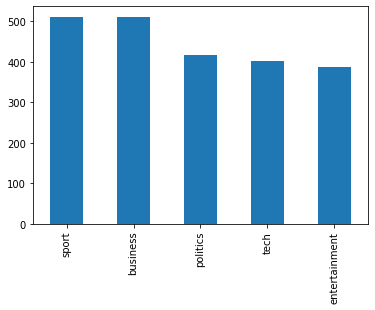

In [31]:
df.target.value_counts().plot(kind='bar')

In [36]:
le = LabelEncoder()
df['target'] = le.fit_transform(df.target)

In [39]:
cls = le.classes_

In [40]:
tf = TfidfVectorizer(stop_words='english')

In [43]:
X = df.text

In [42]:
Y = df.target

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
X_trn= tf.fit_transform(X_train)
X_vl = tf.transform(X_val)

In [47]:
model = MultinomialNB()

In [48]:
model.fit(X_trn, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
y_pred= model.predict(X_vl)

In [52]:
accuracy_score(y_val, y_pred)

0.9685393258426966